In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
db = pd.read_excel("/Users/charlottegallet/Documents/Travail/Consumer survey task.xlsx")

In [7]:
db.head(5)

,Respondent ID,What is your gender?,Which age group do you belong to?,Which category your current PRIMARY device belongs to? (the device you use the most often),Please select the piece of MAIN hardware that you last purchased (at least within 3 months).,What was the brand of this piece of HARDWARE? Please select only one,Please rate from 1 (Not at all) to 10 (Very) how satisfied you are with this piece of hardware.
0,11141579594,Male,60-65,Advanced open system,I have not purchased main hardware within the ...,NaN,NaN
1,11144574599,Male,25-29,Advanced open system,Tank (rebuildable and non-rebuildable),Uwell,10=Very satisfied
2,11144574821,Female,40-44,Advanced open system,Box mod,Geek Vape,10=Very satisfied
3,11144575798,Male,35-39,Advanced open system,Box mod,Other (please specify),10=Very satisfied
4,11144576294,Male,35-39,Advanced open system,Box mod,Vaporesso,10=Very satisfied


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Respondent ID                                                                                    4083 non-null   int64 
 1   What is your gender?                                                                             4083 non-null   object
 2   Which age group do you belong to?                                                                4083 non-null   object
 3   Which category your current PRIMARY device belongs to? (the device you use the most often)       4083 non-null   object
 4   Please select the piece of MAIN hardware that you last purchased (at least within 3 months).     4078 non-null   object
 5   What was the b

In [9]:
db = db.rename(columns={'What is your gender?':'gender','Which age group do you belong to?':'age_group','Which category your current PRIMARY device belongs to? (the device you use the most often)':'primary_device', 'Please select the piece of MAIN hardware that you last purchased (at least within 3 months).':'main_hardware', 'What was the brand of this piece of HARDWARE? Please select only one':'brand', 'Please rate from 1 (Not at all) to 10 (Very) how satisfied you are with this piece of hardware.':'satisfaction'})

In [10]:
# Looking at the unique values and checking the formats
print('Gender: ',db.iloc[:,1].unique())
print('Age Group: ',db.iloc[:,2].unique())
print('Primary Device Category: ',db.iloc[:,3].unique())
print('Main Hardware purchased: ',db.iloc[:,4].unique())
print('Brand of the Hardware: ',db.iloc[:,5].unique())

Gender:  ['Male' 'Female' 'Prefer not to say']
Age Group:  ['60-65' '25-29' '40-44' '35-39' '55-59' '45-49' '30-34' '21-24' 'Over 65'
 '50-54' '18-20' 'Prefer not to say']
Primary Device Category:  ['Advanced open system' 'Basic open system']
Main Hardware purchased:  ['I have not purchased main hardware within the past 3 months'
 'Tank (rebuildable and non-rebuildable)' 'Box mod' 'Starter kit' nan]
Brand of the Hardware:  [nan 'Uwell' 'Geek Vape' 'Other (please specify)' 'Vaporesso' 'Eleaf'
 'Aspire' 'SMOK' 'Voopoo' 'Innokin' 'Wotofo' 'Purge Mod Co' 'Vandy Vape'
 'Joyetech' 'Horizon Tech' 'iJoy' 'Freemax' 'Wismec' 'Sigelei' 'Dovpo'
 'YiHi' 'Hellvape' 'Asmodus' 'I canÂ´t remember' 'Lost Vape' 'Vision'
 'Teslacigs' 'KangerTech' 'OBS' 'Craving Vapor' 'Pioneer4you' 'Ehpro'
 'Sense' 'Hcigar' 'Cloupor' 'Limitless Mod Co' 'Digiflavor' 'Volcano'
 'Provape' 'Council of Vapor' 'Laisimo']


In [11]:
# Cleaning the data inside the rating column
print(db.iloc[:,6].unique())
db.iloc[:,6]=db.iloc[:,6].replace('10=Very satisfied','10')
db.iloc[:,6]=db.iloc[:,6].replace('1=Not at all satisfied','1')
db.iloc[:,6]=db.iloc[:,6].astype(str)
print(db.iloc[:,6].unique())

[nan '10=Very satisfied' 8 9 7 5 6 4 3 2 '1=Not at all satisfied']
['nan' '10' '8' '9' '7' '5' '6' '4' '3' '2' '1']


In [12]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Respondent ID   4083 non-null   int64 
 1   gender          4083 non-null   object
 2   age_group       4083 non-null   object
 3   primary_device  4083 non-null   object
 4   main_hardware   4078 non-null   object
 5   brand           2899 non-null   object
 6   satisfaction    4083 non-null   object
dtypes: int64(1), object(6)
memory usage: 223.4+ KB


In [13]:
# Cleaning the data inside the brand column 
db.iloc[:,5]=db.iloc[:,5].replace('I canÂ´t remember', 'No Brand')


In [14]:
# Replacing the null values from the brand column and rating column 
db.iloc[:,5].fillna("No Brand", inplace=True)
db.iloc[:,6].fillna("No Rating", inplace=True)

In [15]:
# Creating a subgroup for Geek Vape 
GV = db.loc[db.iloc[:,5]== 'Geek Vape']

In [21]:
GV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 2 to 4058
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Respondent ID   452 non-null    int64 
 1   gender          452 non-null    object
 2   age_group       452 non-null    object
 3   primary_device  452 non-null    object
 4   main_hardware   452 non-null    object
 5   brand           452 non-null    object
 6   satisfaction    452 non-null    object
dtypes: int64(1), object(6)
memory usage: 28.2+ KB


In [20]:
GV['gender'].value_counts()/len(GV)

gender
Male                 0.701327
Female               0.289823
Prefer not to say    0.008850
Name: count, dtype: float64

In [22]:
GV['age_group'].value_counts()/len(GV)

age_group
45-49      0.154867
35-39      0.141593
40-44      0.130531
55-59      0.128319
50-54      0.097345
30-34      0.095133
60-65      0.086283
25-29      0.073009
Over 65    0.048673
21-24      0.042035
18-20      0.002212
Name: count, dtype: float64

In [23]:
GV['primary_device'].value_counts()/len(GV)

primary_device
Advanced open system    0.995575
Basic open system       0.004425
Name: count, dtype: float64

In [24]:
GV['main_hardware'].value_counts()/len(GV)

main_hardware
Box mod                                   0.657080
Tank (rebuildable and non-rebuildable)    0.252212
Starter kit                               0.090708
Name: count, dtype: float64

In [26]:
GV["satisfaction"].value_counts()/len(GV)

satisfaction
10    0.683628
9     0.126106
8     0.115044
7     0.055310
5     0.006637
6     0.004425
4     0.004425
1     0.002212
3     0.002212
Name: count, dtype: float64

<Axes: xlabel='gender', ylabel='Count'>

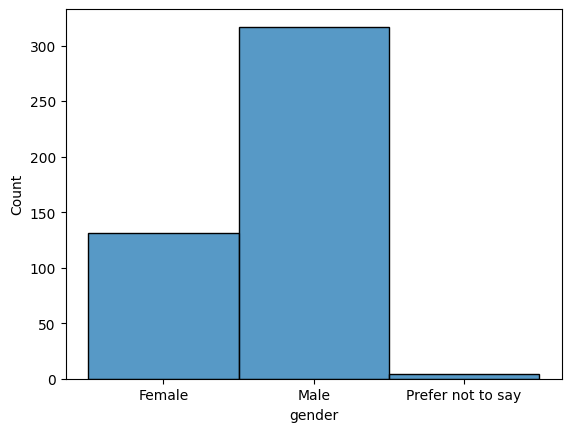

In [225]:
# Plotting the gender distribution for Geek Vape Customers 
sns.histplot(GV.iloc[:,1])

<Axes: xlabel='age_group', ylabel='Count'>

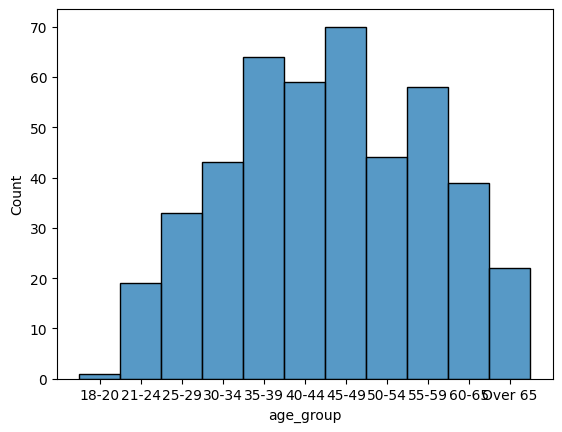

In [226]:
# Plotting the age group distribution for Geek Vape Customers 
sns.histplot(GV.iloc[:,2].sort_values())

Axes(0.125,0.11;0.775x0.77)
primary_device
Advanced open system    450
Basic open system         2
Name: count, dtype: int64


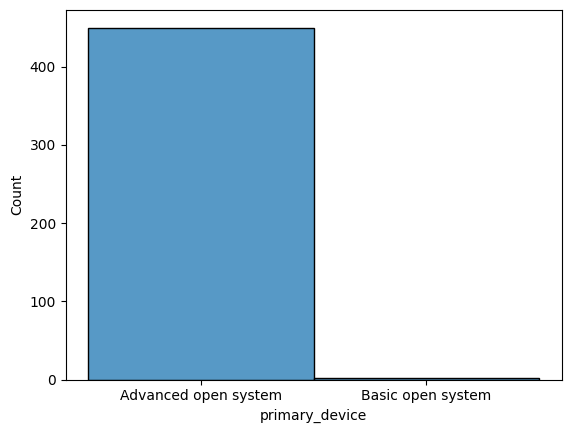

In [227]:
# Plotting the primary devices that are sold by Geek Vape 
print(sns.histplot(GV.iloc[:,3]))
print(GV.iloc[:,3].value_counts())

Axes(0.125,0.11;0.775x0.77)
main_hardware
Box mod                                   297
Tank (rebuildable and non-rebuildable)    114
Starter kit                                41
Name: count, dtype: int64


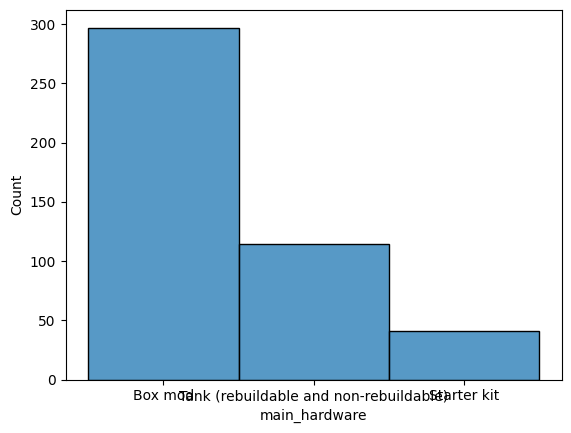

In [228]:
# Plotting the main hardware that are purchased from Geek Vape 
print(sns.histplot(GV.iloc[:,4]))
print(GV.iloc[:,4].value_counts())

Axes(0.125,0.11;0.775x0.77)
satisfaction
10    309
9      57
8      52
7      25
5       3
6       2
4       2
1       1
3       1
Name: count, dtype: int64


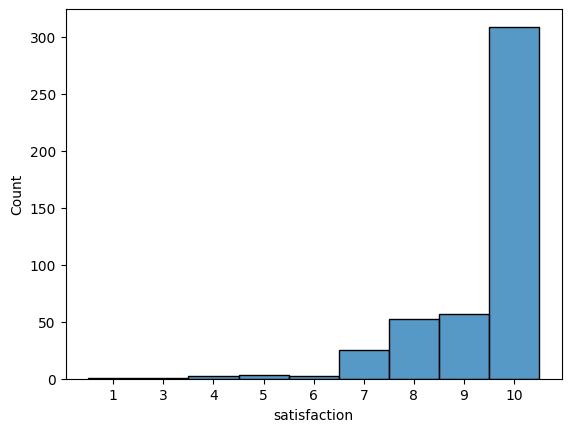

In [229]:
# Plotting the satisfaction from Geek Vape purchases
custom_dict = {'1': 0, '2': 1, '3': 2, '4':3, '5':4, '6':5, '7':6, '8':7, '9':8, '10':9}
print(sns.histplot(GV.iloc[:,6].sort_values(key=lambda x: x.map(custom_dict))))
print(GV.iloc[:,6].value_counts())

<Axes: xlabel='gender', ylabel='Count'>

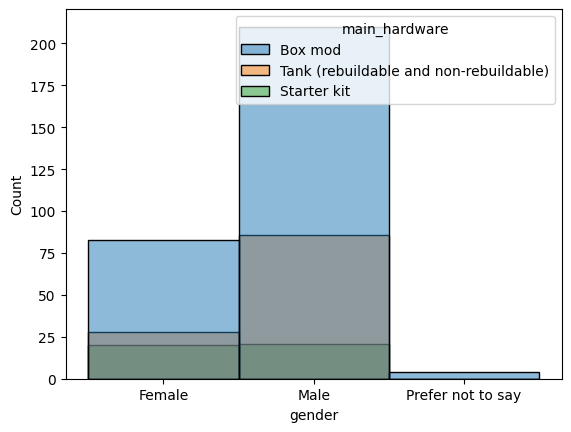

In [230]:
# Plotting the gender distribution per main hardware 
sns.histplot(data=GV, x=GV.iloc[:,1], hue= GV.iloc[:,4])

<Axes: xlabel='age_group', ylabel='Count'>

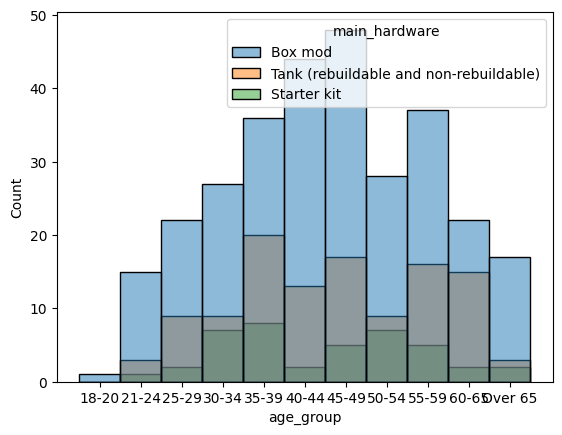

In [231]:
# Plotting the age distribution per main hardware 
sns.histplot(data=GV.sort_values(by='age_group'), x='age_group', hue='main_hardware')

<Axes: xlabel='satisfaction', ylabel='Count'>

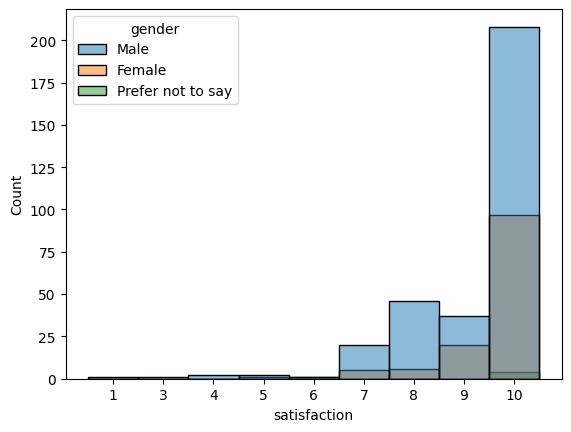

In [234]:
# Plotting the satisfcation distribution per gender 
sns.histplot(data=GV.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue= 'gender')

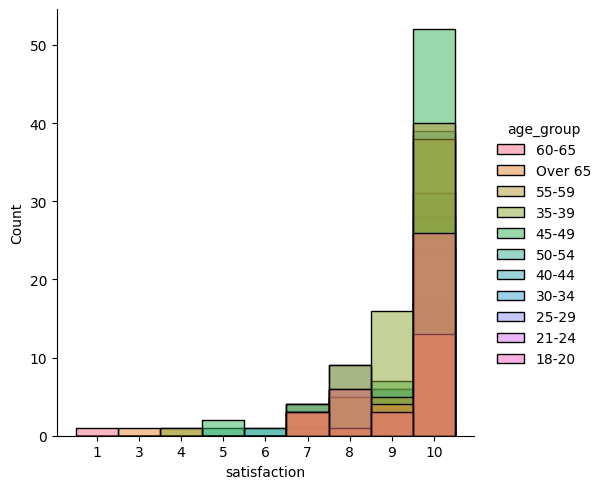

In [242]:
# Plotting the satisfcation distribution per age group 
sns.displot(data=GV.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='age_group')

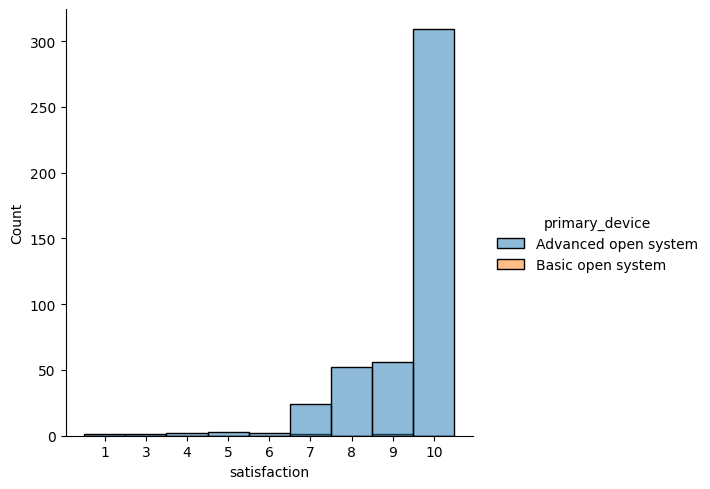

In [239]:
# Plotting the satisfcation distribution per primary device 
sns.displot(data=GV.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='primary_device')

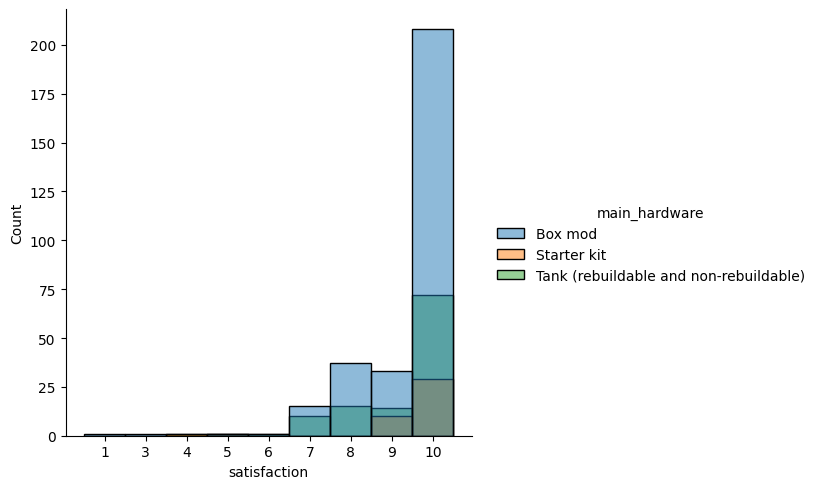

In [241]:
# Plotting the satisfcation distribution per age group 
sns.displot(data=GV.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='main_hardware')

In [243]:
db['brand'].value_counts()

brand
No Brand                  1210
Geek Vape                  452
Other (please specify)     413
SMOK                       324
Voopoo                     146
Aspire                     143
Vandy Vape                 117
Vaporesso                  116
Dovpo                      115
Eleaf                      103
Innokin                    102
Horizon Tech                90
Uwell                       89
Freemax                     85
Wotofo                      68
KangerTech                  67
Hellvape                    60
Asmodus                     55
Sigelei                     51
Lost Vape                   48
Joyetech                    41
Wismec                      38
iJoy                        22
YiHi                        21
Purge Mod Co                21
Teslacigs                   17
OBS                         17
Ehpro                       11
Digiflavor                   7
Pioneer4you                  6
Craving Vapor                5
Hcigar                       4
Li

In [244]:
# Creating a subgroup for SMOK
SMOK = db.loc[db.iloc[:,5]== 'SMOK']

<Axes: xlabel='gender', ylabel='Count'>

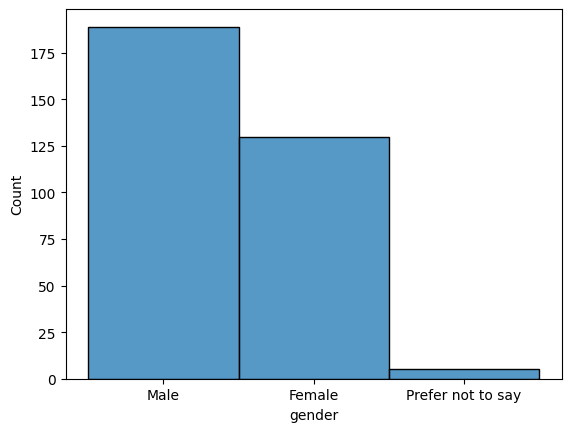

In [245]:
# Plotting the gender distribution for Geek Vape Customers 
sns.histplot(SMOK.iloc[:,1])

<Axes: xlabel='age_group', ylabel='Count'>

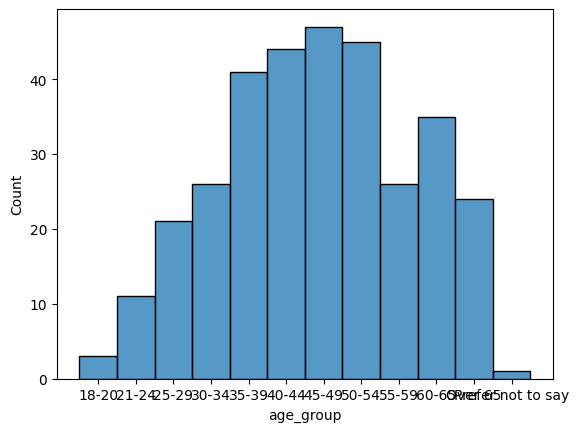

In [246]:
# Plotting the age group distribution for Geek Vape Customers 
sns.histplot(SMOK.iloc[:,2].sort_values())

Axes(0.125,0.11;0.775x0.77)


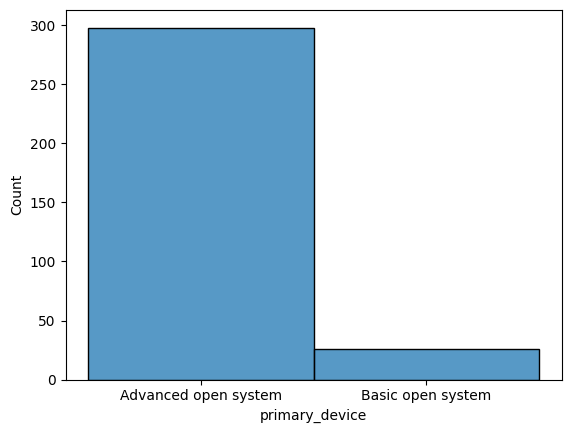

In [248]:
# Plotting the primary devices that are sold by Geek Vape 
print(sns.histplot(SMOK.iloc[:,3]))

Axes(0.125,0.11;0.775x0.77)


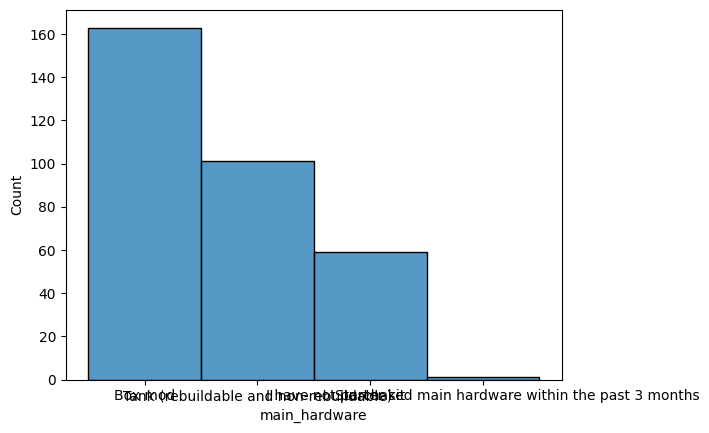

In [249]:
# Plotting the main hardware that are purchased from Geek Vape 
print(sns.histplot(SMOK.iloc[:,4]))

Axes(0.125,0.11;0.775x0.77)
satisfaction
10    171
8      57
9      56
7      22
5       7
3       5
6       3
1       2
2       1
Name: count, dtype: int64


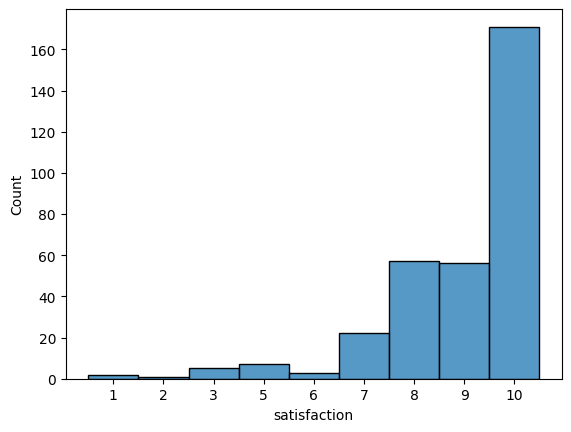

In [250]:
# Plotting the satisfaction from Geek Vape purchases
print(sns.histplot(SMOK.iloc[:,6].sort_values(key=lambda x: x.map(custom_dict))))
print(SMOK.iloc[:,6].value_counts())

<Axes: xlabel='gender', ylabel='Count'>

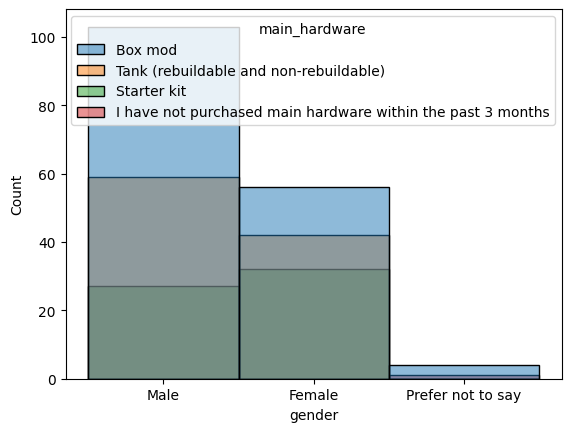

In [252]:
# Plotting the gender distribution per main hardware 
sns.histplot(data=SMOK, x=SMOK.iloc[:,1], hue= SMOK.iloc[:,4])

<Axes: xlabel='age_group', ylabel='Count'>

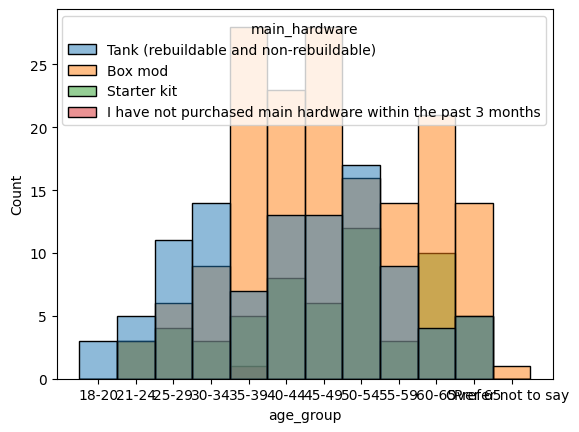

In [253]:
# Plotting the age distribution per main hardware 
sns.histplot(data=SMOK.sort_values(by='age_group'), x='age_group', hue='main_hardware')

<Axes: xlabel='satisfaction', ylabel='Count'>

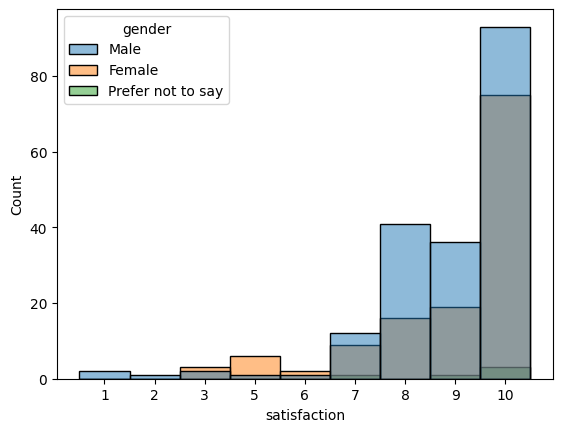

In [254]:
# Plotting the satisfcation distribution per gender 
sns.histplot(data=SMOK.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue= 'gender')

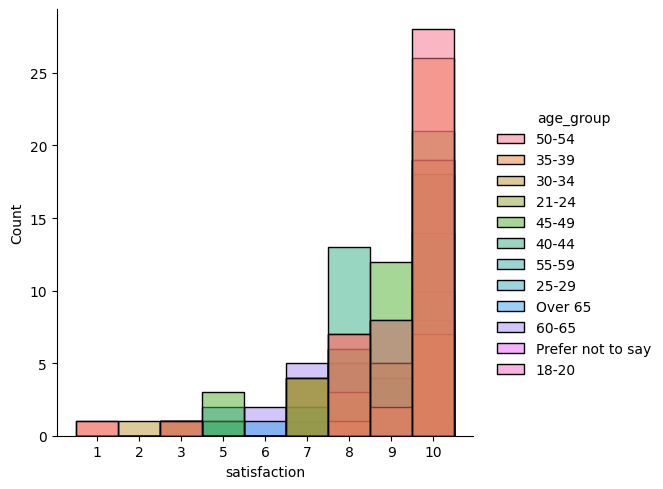

In [255]:
# Plotting the satisfcation distribution per age group 
sns.displot(data=SMOK.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='age_group')

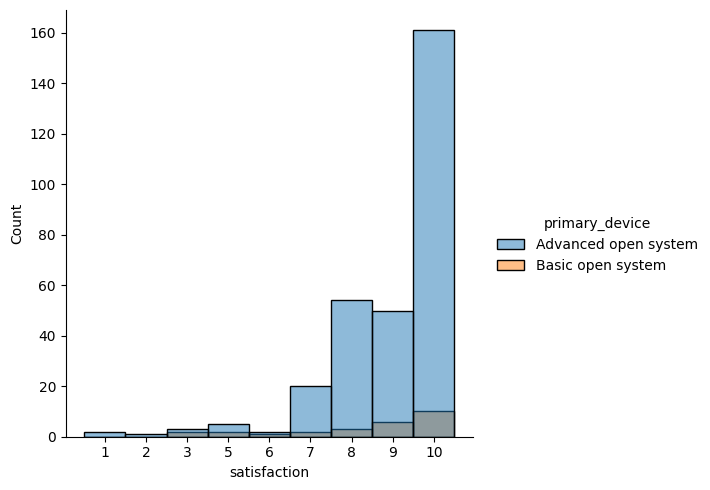

In [256]:
# Plotting the satisfcation distribution per primary device 
sns.displot(data=SMOK.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='primary_device')

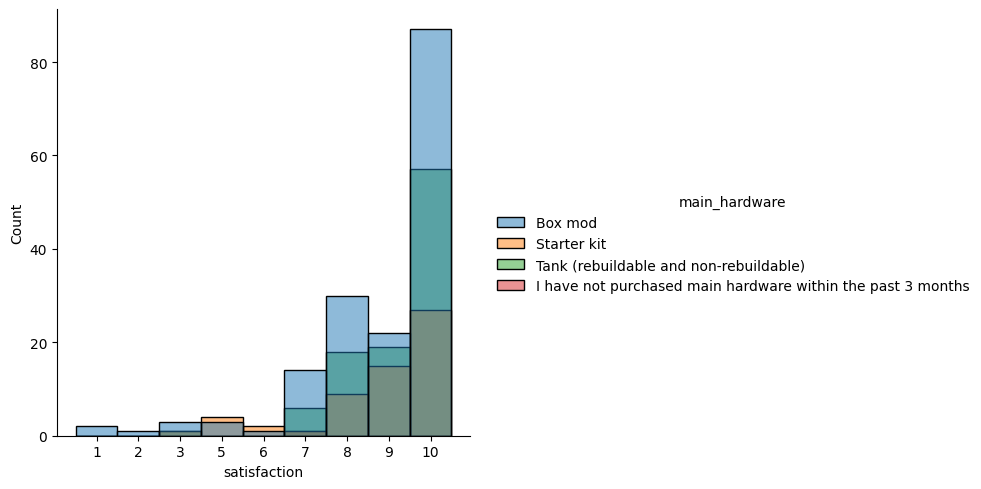

In [257]:
# Plotting the satisfcation distribution per age group 
sns.displot(data=SMOK.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='main_hardware')

In [258]:
# Creating a subgroup for US Market
REST = db.loc[(db.iloc[:,5]!= 'Geek Vape') & (db.iloc[:,5]!= 'SMOK')]

<Axes: xlabel='gender', ylabel='Count'>

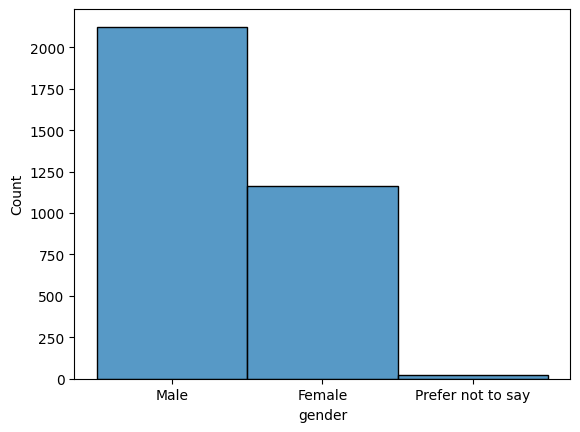

In [259]:
# Plotting the gender distribution for US Customers 
sns.histplot(REST.iloc[:,1])

<Axes: xlabel='age_group', ylabel='Count'>

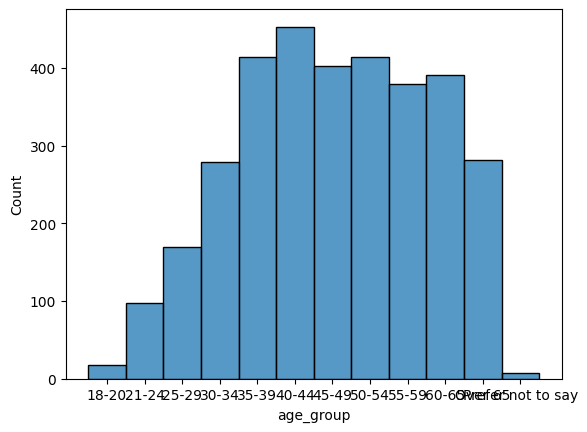

In [260]:
# Plotting the age group distribution for US Customers 
sns.histplot(REST.iloc[:,2].sort_values())

Axes(0.125,0.11;0.775x0.77)


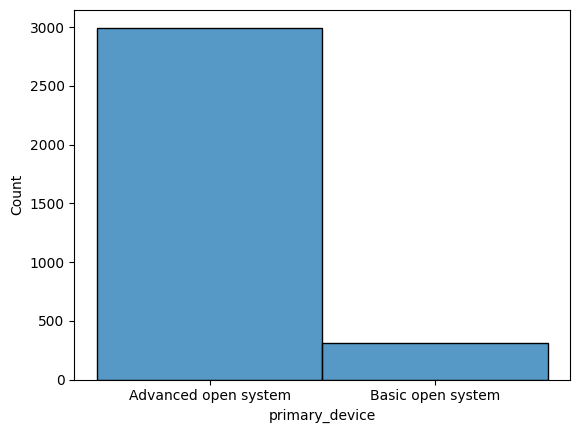

In [261]:
# Plotting the primary devices that are sold in the US
print(sns.histplot(REST.iloc[:,3]))

Axes(0.125,0.11;0.775x0.77)


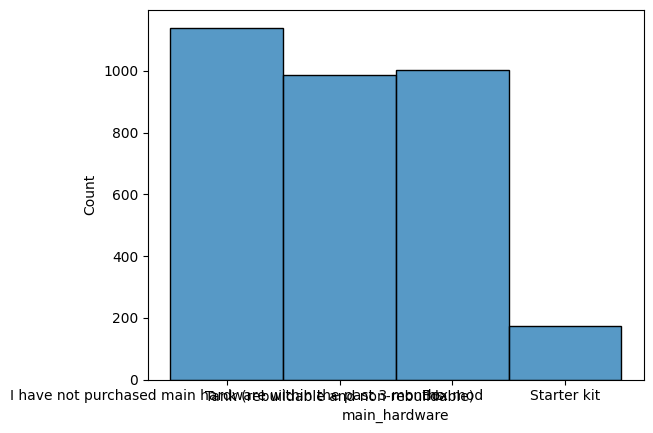

In [262]:
# Plotting the main hardware that are purchased from US
print(sns.histplot(REST.iloc[:,4]))

Axes(0.125,0.11;0.775x0.77)
satisfaction
10    171
8      57
9      56
7      22
5       7
3       5
6       3
1       2
2       1
Name: count, dtype: int64


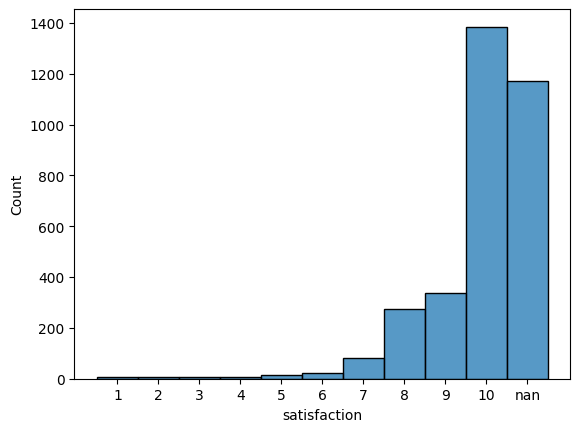

In [263]:
# Plotting the satisfaction from US purchases
print(sns.histplot(REST.iloc[:,6].sort_values(key=lambda x: x.map(custom_dict))))
print(SMOK.iloc[:,6].value_counts())

<Axes: xlabel='gender', ylabel='Count'>

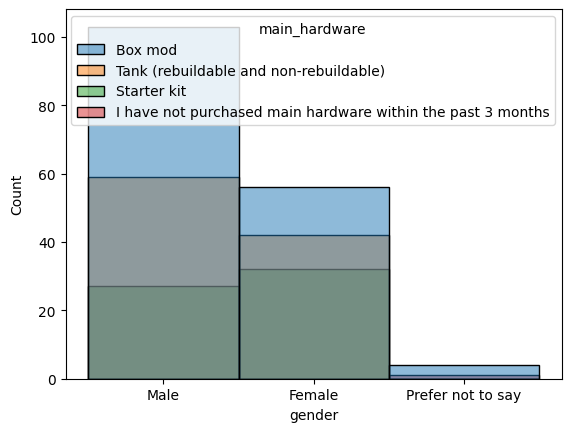

In [264]:
# Plotting the gender distribution per main hardware 
sns.histplot(data=REST, x=SMOK.iloc[:,1], hue= SMOK.iloc[:,4])

<Axes: xlabel='age_group', ylabel='Count'>

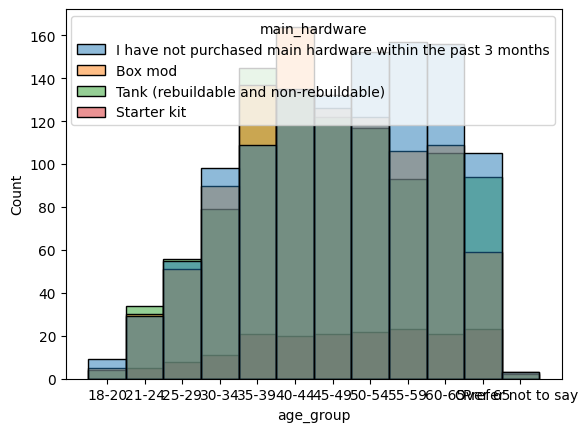

In [265]:
# Plotting the age distribution per main hardware 
sns.histplot(data=REST.sort_values(by='age_group'), x='age_group', hue='main_hardware')

<Axes: xlabel='satisfaction', ylabel='Count'>

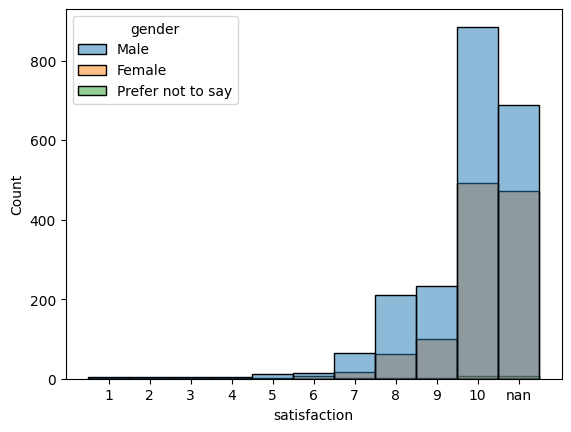

In [266]:
# Plotting the satisfcation distribution per gender 
sns.histplot(data=REST.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue= 'gender')

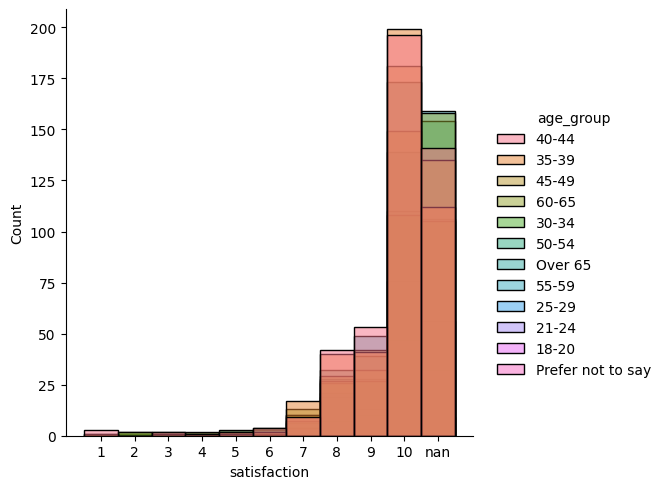

In [267]:
# Plotting the satisfcation distribution per age group 
sns.displot(data=REST.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='age_group')

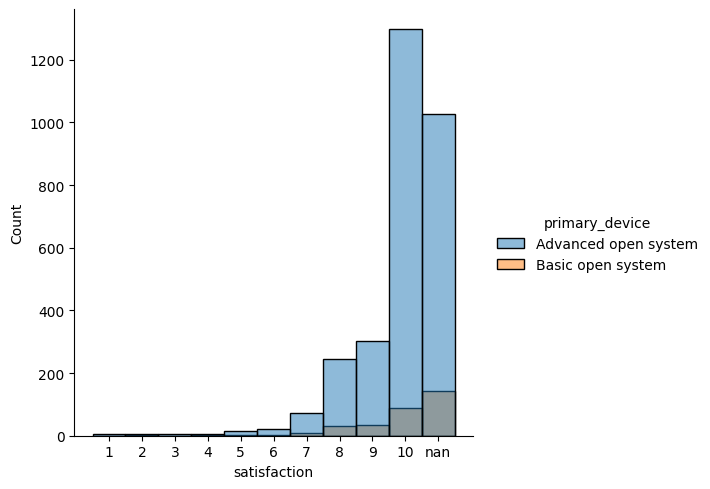

In [268]:
# Plotting the satisfcation distribution per primary device 
sns.displot(data=REST.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='primary_device')

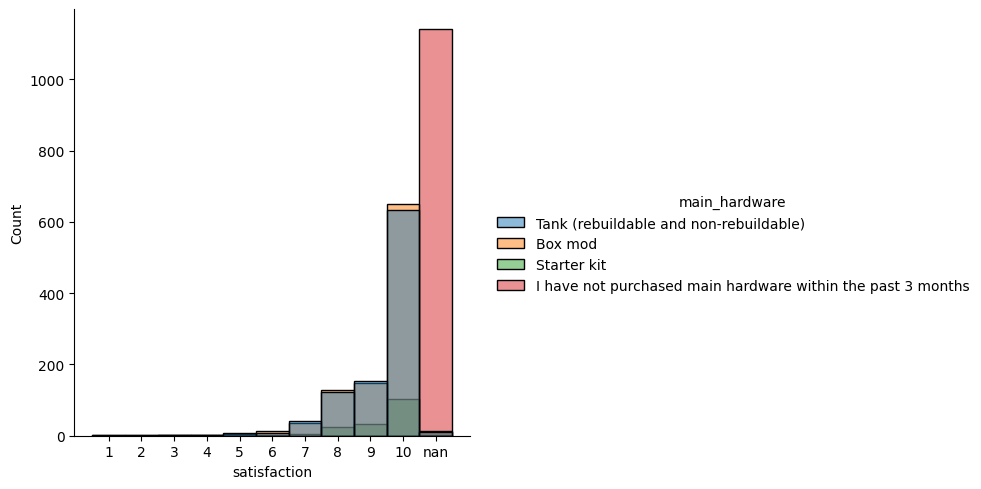

In [269]:
# Plotting the satisfcation distribution per age group 
sns.displot(data=REST.sort_values(by='satisfaction', key=lambda x: x.map(custom_dict)), x='satisfaction', hue='main_hardware')